<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [2]:
%pip install statsmodels
import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

Note: you may need to restart the kernel to use updated packages.


In [3]:
cats = pd.read_csv(r'C:\Users\agc13\Documents\Bootcamp\6-Semana\6.4_lab-AB-Testing\data\cookie_cats.csv')

In [37]:
cats_cross = pd.crosstab(cats.version,cats.retention_1).reset_index(drop = False)

In [43]:
cats_cross.columns

retention_1,version,False,True
0,gate_30,24666,20034
1,gate_40,25370,20119


In [44]:
imps_ctrl, convs_ctrl = 44700, 20034   # Grupo de control 
imps_test, convs_test= 45489, 20119    # Se queda un día 

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.4481879194630872, Test=0.44228274967574577'

In [45]:
from scipy.stats import bernoulli, beta               

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [54]:
x=np.linspace(0.4, 0.5, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

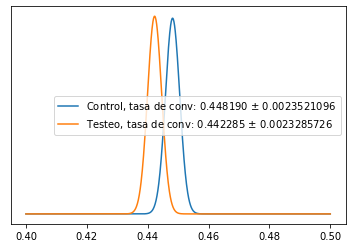

In [55]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [56]:
salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto

-0.013175098158249857

In [68]:
from scipy.stats import beta 

In [80]:
prob = 1 - beta_control.cdf(0.446) # Integral para sacar el área 

In [81]:
'''El test disminuye la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test disminuye la tasa de conversion en un -1.32%, con una probabilidad del 82.41%'

In [82]:
cats_cross2 = pd.crosstab(cats.version,cats.retention_7).reset_index(drop = False)

In [83]:
cats_cross2

retention_7,version,False,True
0,gate_30,36198,8502
1,gate_40,37210,8279


In [84]:
imps_ctrl, convs_ctrl = 44700, 8502   # Grupo de control 
imps_test, convs_test= 45489, 8279    # Se queda un día 

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.19020134228187918, Test=0.18200004396667327'

In [92]:
from scipy.stats import bernoulli, beta               

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.19021520289919913, 0.18201402475214878)

In [97]:
x=np.linspace(0.15, 0.20, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

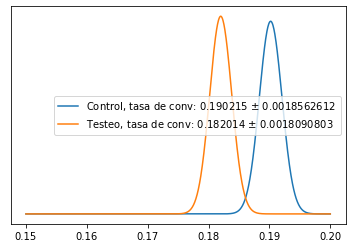

In [98]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [102]:
salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto

-0.04311526114658881

In [103]:
prob = 1 - beta_control.cdf(0.186) # Integral para sacar el área 

In [104]:
prob

0.9887346805864391

In [105]:
'''El test disminuye la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test disminuye la tasa de conversion en un -4.31%, con una probabilidad del 98.87%'